# Section 1 - The leaky-integrate and fire (LIF) model and python basics

## Section 1.1: Python basics

In order to write programs, we need a few basics: 

We will program our scripts in python, a very versatile and widely used programming language. 
To execute the written programs we need a <i>python interpreter</i>. Google colab allows us to run an instance in the cloud, without the need to install anything locally on the computer. 

### Print
We will start with the infamous 'hello world' example: 

You can call the interpreter to execute the code within each cell of this notebook by pressing 'shift+Enter' on your keyboard. 

Try this with the next cell to print 'Hello World':

In [1]:
print ('Hello World')

Hello World


What happend? 
We called a python function ```print``` 
This function takes an argument which we presented within the brackets, in this case ```'Hello World'```.
The argument is then printed out.

### Variables and comments
You might notice the single quotes (') around Hello World, they define a data type in python that is called <i>String</i>

Instead of printing it directly, we now want to store the string in a variable 'words' and then print this variable. 
Try it by executing the following cell:

In [2]:
words = 'Hello World'
print (words)

Hello World


Great. There are two more data types we need to know:  <i>int</i> and <i>float</i>

<i>int</i> is used for an integer, 
<i>float</i> is used for a float point variable,
<i>bool</i> is used for a boolean, to indicate True, or False - and <i>lists</i> are used for lists of variables that can consist of the other types:
``` python
example_integer = 5
example_float = 1.234
example_boolean = True
example_list_1 = [1,2,3,5]
example_list_2 = [1.2, True, False, 4, 'hello']
```

You can see that in python, we implicitly define the variable type simply by assigning a value to the variable.

once defined we can re-use the variables later on, as in the example above with the print function. When defining variables, it is useful to be consistent throughout your code and to follow guidelines.
A general guideline is [PEP8](https://peps.python.org/pep-0008/). 

For example it is common for variable names to use lowercase letters and (if necessary) underscores between words.

Another concept of programming is the comment:

``` python
# <- everything in the same line after this symbol is not evaluated by the interpreter
```

We can also add comments that span multiple lines (we start and end those with three quotation marks):
``` python
""" 
    This is a nice comment that is so long
    it needs multiple lines
"""
```

Comments can be used to describe parts of the code or give additional information.

Now we want to put all of this together. Follow the instructions given in the comments in the cell below. When you are done, execute the cell:

#### Excercise 

<p style='color:#FF0000';> TODO </p>

In [2]:
"""
Excercise 1 : In this cell we want to add two numbers and print the result.
"""

# Define the first variable and assign the value 7
first_var = 7
# Now define the second value and assign the value 5
second_var = 5

# Now you can define a third variable and assign the sum of the two values to it
final_var = first_var + second_var

# And finally we print the number
print (final_var)

[Click here for the solution](

### For Loops 

A very versitale concept in programming is the for loop. It allows us to execute the same code multiple times, often while using different values for our parameters. 

Let's assume we want to print three time steps (0, 1 and 2).

In the following cell we see four distinc solutions to this problem, all with the same outcome.


In [4]:
# one option is to print every timestep
print ('Option A')
print (0)
print (1)
print (2)
# However, you can imagine this becomes very tideous for many time steps

# another option is the for loop:
print ('Option B')
for step in [0,1,2]:
    print (step)
    
    
# We can also use pythons 'range' function with the same result
print ('Option C')
start = 0
end = 3
stepsize = 1
for step in range(start, end, stepsize):
    print(step)


# The function also has default parameters
# if not provided, start is assumed to be 0 and stepsize to be 1
# therefore, we can also write
print ('Option D')
for step in range(3):
    print(step)


Option A
0
1
2
Option B
0
1
2
Option C
0
1
2
Option D
0
1
2


It is important to note the intendation that we used for the for loop. 

Python uses intendation to structure the code. The definition of the for loop ends with a colon and everything that belongs in the loop needs to be written below with (at least, as we see later) the same intendation.

Often, the intendation is four spaces.

```python
for variable_name in range(range_length):
    print (variable_name)
```
    

### if condition

Another important concept for programming is the if condition. It allows us to check if a certain condition is met and to execute certain code only if this is the case.

The definition of an if-condition is again concluded with a colon and the code to execute if the condition is true is indented (again, we use four spaces)

```python
if condition:
    {code to execute}
```

Going back to the example above - we now want to run the for loop longer, but we only want to print the timesteps if they meet certain conditions



In [5]:
print ('Test condition 1')
for step in range(40):
    if step == 20:
        print(step)
        
print ('Test condition 2')
for step in range(40):
    if step %10 == 0:
        print(step)
        
print ('Test condition 1')
for step in range(40):
    if step > 35:
        print(step)
        
print ('Test condition 1')
for step in range(40):
    if step <= 1 or step >= 38:
        print(step)

Test condition 1
20
Test condition 2
0
10
20
30
Test condition 1
36
37
38
39
Test condition 1
0
1
38
39


##### Excercise  


<p style='color:#FF0000';> TODO </p>

They should run loops and print specific numbers

In [6]:
'''
 Excercicse: Here we want to 
'''

'\n\n'

## Functions

We already know a function: 
```python 
print()
```

Now we want to write our own. In general, a function is able to receive variables, perform an operation and then return variables.

For example:
```python
def example_function (a):
    print (a)
    b = a + 5
    return b
```

The function we define here takes a variable ```a```, prints it, adds 5 and returns the calcluated value. 
Let's try to use this function

In [3]:
def example_function (a):
    print (a)
    b = a + 5
    return b

returned_value = example_function(a = 7)
print (returned_value)

7
12


##### Excercise  


<p style='color:#FF0000';> TODO </p>

They should run loops and print specific numbers

## Section 1.2 The LIF model

Great!

Now we continue with more advanced python concepts while implementing the leaky-integrate and fire model:

As a reminder, here is the differential equation that describes the membrane potential of our neuron:

\begin{align}
\tau_m\,\frac{d}{dt}\,V(t) &= E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\ \\
V(t) &= V_{reset} &\text{otherwise}
\end{align}

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. We can also write $V_m$ for membrane potential, which is more convenient for plot labels.

The membrane equation describes the time evolution of membrane potential $V(t)$ in response to synaptic input and leaking of charge across the cell membrane. This is an *ordinary differential equation (ODE)*.


### Defining Parameters 

We first define the parameters we need in order to simulate our neuron model. In order to define and print the parameters below, you need to 'comment out' the code first before you run the cell

In [7]:
# t_max = 150e-3   # second
# dt = 1e-3        # second
# tau = 20e-3      # second
# el = -60e-3      # milivolt
# vr = -70e-3      # milivolt
# vth = -50e-3     # milivolt
# r = 100e6        # ohm
# i_mean = 25e-11  # ampere

# print(t_max, dt, tau, el, vr, vth, r, i_mean)

After executing the cell above, you should see all defined parameters printed. You might have noted that we use variable names that correspond to the names in the math notation. We also use comments behing the variables, to indicate what unit we used for those numbers.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Settings for the figures
plt.style.use(plt.style.available[20])
plt.style.use("https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/plots_style.txt")

[Text(0.5, 0, 'X Label'), Text(0, 0.5, 'Y Label'), Text(0.5, 1.0, 'Title')]

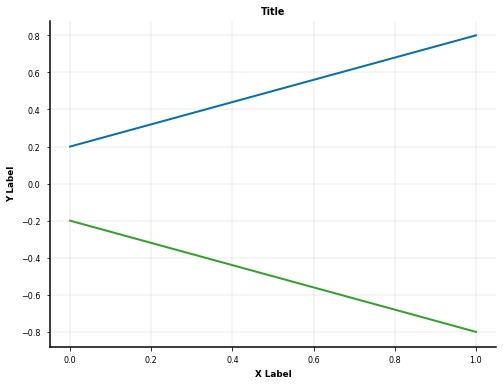

In [9]:
fig, ax = plt.subplots()
ax.plot([0,1],[0.2,0.8])
ax.plot([0,1],[-0.2,-0.8])
ax.set(
    xlabel='X Label',
    ylabel='Y Label',
    title='Title')